### Arquitetura Feature Store

#### Pipeline de Ingestão

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [110]:
# Carregar os arquivos JSON
vagas = pd.read_json("./dados/raw/vagas.json").T
prospects = pd.read_json("./dados/raw/prospects.json").T
applicants = pd.read_json("./dados/raw/applicants.json").T

#Resetando index para evitar problemas de indexacao
vagas.reset_index(inplace=True)
prospects.reset_index(inplace=True)
applicants.reset_index(inplace=True)

##### Resetando Index e renomeando o nome da coluna chave

In [111]:
#Dataframe Vagas.json
vagas = vagas.rename(columns={'index': 'vaga_id'})
vagas.head()

,vaga_id,informacoes_basicas,perfil_vaga,beneficios
0,5185,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '..."
1,5184,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '..."
2,5183,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '..."
3,5182,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '- p/ mês (168h)', 'valor_comp..."
4,5181,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '..."


In [112]:
prospects.head()

,index,titulo,modalidade,prospects
0,4530,CONSULTOR CONTROL M,,"[{'nome': 'José Vieira', 'codigo': '25632', 's..."
1,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,"[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '..."
2,4532,,,[]
3,4533,2021-2605708-Microfocus Application Life Cycle...,,"[{'nome': 'Arthur Almeida', 'codigo': '26338',..."
4,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,"[{'nome': 'Ana Luiza Vieira', 'codigo': '26361..."


In [113]:
#Dataframe Prospects.json
prospects.rename(columns={"index": "codigo_vaga"}, inplace=True)
prospects.head()

,codigo_vaga,titulo,modalidade,prospects
0,4530,CONSULTOR CONTROL M,,"[{'nome': 'José Vieira', 'codigo': '25632', 's..."
1,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,"[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '..."
2,4532,,,[]
3,4533,2021-2605708-Microfocus Application Life Cycle...,,"[{'nome': 'Arthur Almeida', 'codigo': '26338',..."
4,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,"[{'nome': 'Ana Luiza Vieira', 'codigo': '26361..."


In [114]:
#Dataframe Applicants.json
applicants.rename(columns={"index": "codigo_candidato"}, inplace=True)
applicants.head()

,codigo_candidato,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en
0,31000,"{'telefone_recado': '', 'telefone': '(11) 9704...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,
1,31001,"{'telefone_recado': '', 'telefone': '(11) 9372...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,
2,31002,"{'telefone_recado': '', 'telefone': '(11) 9239...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,
3,31003,"{'telefone_recado': '', 'telefone': '(11) 9810...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,
4,31004,"{'telefone_recado': '', 'telefone': '(11) 9251...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,


#### Transformação de Dados 

##### DataFrame Vagas.json

In [115]:
# informacoes_basicas
vagas_inf_basica = pd.json_normalize(vagas['informacoes_basicas'])
vagas_inf_basica.head()

,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,tipo_contratacao,prazo_contratacao,objetivo_vaga,prioridade_vaga,origem_vaga,superior_imediato,nome,telefone,data_inicial,data_final,nome_substituto
0,04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,CLT Full,,,,,Superior Imediato:,,,NaN,NaN,NaN
1,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,CLT Full,,Contratação,,,Superior Imediato:,,,NaN,NaN,NaN
2,04-05-2021,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Ana Albuquerque,CLT Full,,RFP,,,Superior Imediato:,,,NaN,NaN,NaN
3,04-05-2021,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,Decision São Paulo,Cecília Freitas,Clara Rios,"PJ/Autônomo, CLT Full",Determinado,Contratação,Alta: Alta complexidade 3 a 5 dias,,Superior Imediato:,NaN,NaN,18-05-2021,17-01-2022,NaN
4,04-05-2021,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,CLT Full,,,,,Superior Imediato:,,,NaN,NaN,NaN


In [116]:
vagas_inf_basica.shape

(14081, 20)

In [117]:
print(vagas_inf_basica.isnull().sum())

data_requicisao                         0
limite_esperado_para_contratacao        0
titulo_vaga                             0
vaga_sap                                0
cliente                                 0
solicitante_cliente                     0
empresa_divisao                         0
requisitante                            0
analista_responsavel                    0
tipo_contratacao                        0
prazo_contratacao                       0
objetivo_vaga                           0
prioridade_vaga                         0
origem_vaga                             0
superior_imediato                      42
nome                                 4456
telefone                             4762
data_inicial                         9625
data_final                           9625
nome_substituto                     13733
dtype: int64


In [118]:
vagas = pd.concat([vagas, vagas_inf_basica], axis=1)
vagas.head()

,vaga_id,informacoes_basicas,perfil_vaga,beneficios,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,...,prazo_contratacao,objetivo_vaga,prioridade_vaga,origem_vaga,superior_imediato,nome,telefone,data_inicial,data_final,nome_substituto
0,5185,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,,,,,Superior Imediato:,,,NaN,NaN,NaN
1,5184,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,,Contratação,,,Superior Imediato:,,,NaN,NaN,NaN
2,5183,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,,RFP,,,Superior Imediato:,,,NaN,NaN,NaN
3,5182,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '- p/ mês (168h)', 'valor_comp...",04-05-2021,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,...,Determinado,Contratação,Alta: Alta complexidade 3 a 5 dias,,Superior Imediato:,NaN,NaN,18-05-2021,17-01-2022,NaN
4,5181,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,...,,,,,Superior Imediato:,,,NaN,NaN,NaN


In [119]:
vagas.columns

Index(['vaga_id', 'informacoes_basicas', 'perfil_vaga', 'beneficios',
       'data_requicisao', 'limite_esperado_para_contratacao', 'titulo_vaga',
       'vaga_sap', 'cliente', 'solicitante_cliente', 'empresa_divisao',
       'requisitante', 'analista_responsavel', 'tipo_contratacao',
       'prazo_contratacao', 'objetivo_vaga', 'prioridade_vaga', 'origem_vaga',
       'superior_imediato', 'nome', 'telefone', 'data_inicial', 'data_final',
       'nome_substituto'],
      dtype='object')

In [120]:
# perfil_vaga
vagas_perfil_vaga = pd.json_normalize(vagas['perfil_vaga'])
vagas_perfil_vaga.head()


,pais,estado,cidade,bairro,regiao,local_trabalho,vaga_especifica_para_pcd,faixa_etaria,horario_trabalho,nivel profissional,...,nivel_ingles,nivel_espanhol,outro_idioma,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias
0,Brasil,São Paulo,São Paulo,,,2000,Não,De: Até:,,Sênior,...,Avançado,Fluente,,TI - Sistemas e Ferramentas-,Operations Lead\n\nRoles & Responsibilities:\n...,Required Skills:\n• Prior experience in Cloud ...,100% Remoto Período – entre 5 – 6 meses,,Nenhum -,NaN
1,Brasil,São Paulo,São Paulo,,,2000,Não,De: Até:,,Sênior,...,Fluente,Nenhum,,TI - Desenvolvimento/Programação-,Consultor PP/QM Sr.\n\n• Consultor PP/QM Sênio...,• Consultor PP/QM Sênior com experiencia em pr...,• Início: Imediato • Fim: Jan/22,,Nenhum -,NaN
2,Brasil,São Paulo,São Paulo,,,2000,Não,De: Até:,,Analista,...,Nenhum,Intermediário,,TI - Sistemas e Ferramentas-,Descrição – Atividades:\n\no Monitoramento das...,Requisitos mandatórios:\n\no Conhecimentos Téc...,Localização: Remoto Perfil: Analista Pleno ou ...,,Nenhum -,NaN
3,Brasil,São Paulo,São Paulo,,,2000,Não,De: Até:,,Analista,...,Básico,Básico,,TI - Projetos-,Descrição/Comentário: Architecture Frameworks ...,Descrição/Comentário: Architecture Frameworks ...,Budgeted Rate - indicate currency and type (ho...,Não,Notebook padrão -,NaN
4,Brasil,São Paulo,São Paulo,,,2000,Não,De: Até:,,Sênior,...,Intermediário,Nenhum,,TI - SAP-,Experiência como Consultor SAP AUTHORIZATION (...,Experiência como Consultor SAP AUTHORIZATION (...,contratação CLT full pela Decision locação rem...,Sim,Nenhum -,NaN


In [121]:
vagas_perfil_vaga.shape

(14081, 21)

In [122]:
print(vagas_perfil_vaga.isnull().sum())

pais                                           0
estado                                         0
cidade                                         0
bairro                                         0
regiao                                         0
local_trabalho                                 0
vaga_especifica_para_pcd                       0
faixa_etaria                                   0
horario_trabalho                               0
nivel profissional                             0
nivel_academico                                0
nivel_ingles                                   0
nivel_espanhol                                 0
outro_idioma                                   0
areas_atuacao                                  0
principais_atividades                          0
competencia_tecnicas_e_comportamentais         0
demais_observacoes                             0
viagens_requeridas                             0
equipamentos_necessarios                    2685
habilidades_comporta

In [123]:
vagas = pd.concat([vagas, vagas_perfil_vaga], axis=1)
vagas.head()

,vaga_id,informacoes_basicas,perfil_vaga,beneficios,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,...,nivel_ingles,nivel_espanhol,outro_idioma,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias
0,5185,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,Avançado,Fluente,,TI - Sistemas e Ferramentas-,Operations Lead\n\nRoles & Responsibilities:\n...,Required Skills:\n• Prior experience in Cloud ...,100% Remoto Período – entre 5 – 6 meses,,Nenhum -,NaN
1,5184,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,Fluente,Nenhum,,TI - Desenvolvimento/Programação-,Consultor PP/QM Sr.\n\n• Consultor PP/QM Sênio...,• Consultor PP/QM Sênior com experiencia em pr...,• Início: Imediato • Fim: Jan/22,,Nenhum -,NaN
2,5183,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,Nenhum,Intermediário,,TI - Sistemas e Ferramentas-,Descrição – Atividades:\n\no Monitoramento das...,Requisitos mandatórios:\n\no Conhecimentos Téc...,Localização: Remoto Perfil: Analista Pleno ou ...,,Nenhum -,NaN
3,5182,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '- p/ mês (168h)', 'valor_comp...",04-05-2021,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,...,Básico,Básico,,TI - Projetos-,Descrição/Comentário: Architecture Frameworks ...,Descrição/Comentário: Architecture Frameworks ...,Budgeted Rate - indicate currency and type (ho...,Não,Notebook padrão -,NaN
4,5181,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,...,Intermediário,Nenhum,,TI - SAP-,Experiência como Consultor SAP AUTHORIZATION (...,Experiência como Consultor SAP AUTHORIZATION (...,contratação CLT full pela Decision locação rem...,Sim,Nenhum -,NaN


In [124]:
vagas.columns

Index(['vaga_id', 'informacoes_basicas', 'perfil_vaga', 'beneficios',
       'data_requicisao', 'limite_esperado_para_contratacao', 'titulo_vaga',
       'vaga_sap', 'cliente', 'solicitante_cliente', 'empresa_divisao',
       'requisitante', 'analista_responsavel', 'tipo_contratacao',
       'prazo_contratacao', 'objetivo_vaga', 'prioridade_vaga', 'origem_vaga',
       'superior_imediato', 'nome', 'telefone', 'data_inicial', 'data_final',
       'nome_substituto', 'pais', 'estado', 'cidade', 'bairro', 'regiao',
       'local_trabalho', 'vaga_especifica_para_pcd', 'faixa_etaria',
       'horario_trabalho', 'nivel profissional', 'nivel_academico',
       'nivel_ingles', 'nivel_espanhol', 'outro_idioma', 'areas_atuacao',
       'principais_atividades', 'competencia_tecnicas_e_comportamentais',
       'demais_observacoes', 'viagens_requeridas', 'equipamentos_necessarios',
       'habilidades_comportamentais_necessarias'],
      dtype='object')

In [125]:
# beneficios
vagas_beneficios = pd.json_normalize(vagas['beneficios'])
vagas_beneficios.head()

,valor_venda,valor_compra_1,valor_compra_2
0,-,R$,
1,-,R$,
2,-,R$,
3,- p/ mês (168h),fechado,
4,-,R$,


In [126]:
vagas_beneficios.shape

(14081, 3)

In [127]:
print(vagas_beneficios.nunique())

valor_venda       861
valor_compra_1    955
valor_compra_2     41
dtype: int64


In [128]:
vagas_beneficios.isnull().sum()

valor_venda       0
valor_compra_1    0
valor_compra_2    0
dtype: int64

In [129]:
vagas_transform = pd.concat([vagas, vagas_beneficios], axis=1)
vagas_transform.head()

,vaga_id,informacoes_basicas,perfil_vaga,beneficios,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,5185,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,TI - Sistemas e Ferramentas-,Operations Lead\n\nRoles & Responsibilities:\n...,Required Skills:\n• Prior experience in Cloud ...,100% Remoto Período – entre 5 – 6 meses,,Nenhum -,NaN,-,R$,
1,5184,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,TI - Desenvolvimento/Programação-,Consultor PP/QM Sr.\n\n• Consultor PP/QM Sênio...,• Consultor PP/QM Sênior com experiencia em pr...,• Início: Imediato • Fim: Jan/22,,Nenhum -,NaN,-,R$,
2,5183,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,...,TI - Sistemas e Ferramentas-,Descrição – Atividades:\n\no Monitoramento das...,Requisitos mandatórios:\n\no Conhecimentos Téc...,Localização: Remoto Perfil: Analista Pleno ou ...,,Nenhum -,NaN,-,R$,
3,5182,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '- p/ mês (168h)', 'valor_comp...",04-05-2021,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,...,TI - Projetos-,Descrição/Comentário: Architecture Frameworks ...,Descrição/Comentário: Architecture Frameworks ...,Budgeted Rate - indicate currency and type (ho...,Não,Notebook padrão -,NaN,- p/ mês (168h),fechado,
4,5181,"{'data_requicisao': '04-05-2021', 'limite_espe...","{'pais': 'Brasil', 'estado': 'São Paulo', 'cid...","{'valor_venda': '-', 'valor_compra_1': 'R$', '...",04-05-2021,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,...,TI - SAP-,Experiência como Consultor SAP AUTHORIZATION (...,Experiência como Consultor SAP AUTHORIZATION (...,contratação CLT full pela Decision locação rem...,Sim,Nenhum -,NaN,-,R$,


In [130]:
vagas_transform.columns

Index(['vaga_id', 'informacoes_basicas', 'perfil_vaga', 'beneficios',
       'data_requicisao', 'limite_esperado_para_contratacao', 'titulo_vaga',
       'vaga_sap', 'cliente', 'solicitante_cliente', 'empresa_divisao',
       'requisitante', 'analista_responsavel', 'tipo_contratacao',
       'prazo_contratacao', 'objetivo_vaga', 'prioridade_vaga', 'origem_vaga',
       'superior_imediato', 'nome', 'telefone', 'data_inicial', 'data_final',
       'nome_substituto', 'pais', 'estado', 'cidade', 'bairro', 'regiao',
       'local_trabalho', 'vaga_especifica_para_pcd', 'faixa_etaria',
       'horario_trabalho', 'nivel profissional', 'nivel_academico',
       'nivel_ingles', 'nivel_espanhol', 'outro_idioma', 'areas_atuacao',
       'principais_atividades', 'competencia_tecnicas_e_comportamentais',
       'demais_observacoes', 'viagens_requeridas', 'equipamentos_necessarios',
       'habilidades_comportamentais_necessarias', 'valor_venda',
       'valor_compra_1', 'valor_compra_2'],
      dtyp

In [131]:
vagas_transform = vagas_transform.drop(columns=['informacoes_basicas', 'perfil_vaga', 'beneficios'])
vagas_transform.head()

,vaga_id,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,areas_atuacao,principais_atividades,competencia_tecnicas_e_comportamentais,demais_observacoes,viagens_requeridas,equipamentos_necessarios,habilidades_comportamentais_necessarias,valor_venda,valor_compra_1,valor_compra_2
0,5185,04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,TI - Sistemas e Ferramentas-,Operations Lead\n\nRoles & Responsibilities:\n...,Required Skills:\n• Prior experience in Cloud ...,100% Remoto Período – entre 5 – 6 meses,,Nenhum -,NaN,-,R$,
1,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,TI - Desenvolvimento/Programação-,Consultor PP/QM Sr.\n\n• Consultor PP/QM Sênio...,• Consultor PP/QM Sênior com experiencia em pr...,• Início: Imediato • Fim: Jan/22,,Nenhum -,NaN,-,R$,
2,5183,04-05-2021,00-00-0000,ANALISTA PL/JR C/ SQL,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Ana Albuquerque,...,TI - Sistemas e Ferramentas-,Descrição – Atividades:\n\no Monitoramento das...,Requisitos mandatórios:\n\no Conhecimentos Téc...,Localização: Remoto Perfil: Analista Pleno ou ...,,Nenhum -,NaN,-,R$,
3,5182,04-05-2021,18-05-2021,Technical Architect - 11894809,Não,Nelson-Page,Dr. Raul Monteiro,Decision São Paulo,Cecília Freitas,Clara Rios,...,TI - Projetos-,Descrição/Comentário: Architecture Frameworks ...,Descrição/Comentário: Architecture Frameworks ...,Budgeted Rate - indicate currency and type (ho...,Não,Notebook padrão -,NaN,- p/ mês (168h),fechado,
4,5181,04-05-2021,00-00-0000,Consultor SAP AUTHORIZATION (BCA) -Pleno / Sênior,Não,Mann and Sons,Cauê Fogaça,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,TI - SAP-,Experiência como Consultor SAP AUTHORIZATION (...,Experiência como Consultor SAP AUTHORIZATION (...,contratação CLT full pela Decision locação rem...,Sim,Nenhum -,NaN,-,R$,


##### DataFrame Prospects.json

In [132]:
prospects.head()

,codigo_vaga,titulo,modalidade,prospects
0,4530,CONSULTOR CONTROL M,,"[{'nome': 'José Vieira', 'codigo': '25632', 's..."
1,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,"[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '..."
2,4532,,,[]
3,4533,2021-2605708-Microfocus Application Life Cycle...,,"[{'nome': 'Arthur Almeida', 'codigo': '26338',..."
4,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,"[{'nome': 'Ana Luiza Vieira', 'codigo': '26361..."


In [133]:
prospects_prospects = prospects.explode('prospects')  # Cada dicionário vira uma linha
print(prospects_prospects.head())

   codigo_vaga                                             titulo modalidade  \
0         4530                                CONSULTOR CONTROL M              
0         4530                                CONSULTOR CONTROL M              
1         4531  2021-2607395-PeopleSoft Application Engine-Dom...              
1         4531  2021-2607395-PeopleSoft Application Engine-Dom...              
2         4532                                                                 

                                           prospects  
0  {'nome': 'José Vieira', 'codigo': '25632', 'si...  
0  {'nome': 'Srta. Isabela Cavalcante', 'codigo':...  
1  {'nome': 'Sra. Yasmin Fernandes', 'codigo': '2...  
1  {'nome': 'Alexia Barbosa', 'codigo': '25360', ...  
2                                                NaN  


In [134]:
prospects_prospects.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56702 entries, 0 to 14221
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   codigo_vaga  56702 non-null  int64 
 1   titulo       56702 non-null  object
 2   modalidade   56702 non-null  object
 3   prospects    53759 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.2+ MB


In [135]:
prospects_prospects = prospects_prospects['prospects'].apply(pd.Series)
prospects_prospects.head()

,nome,codigo,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador,0
0,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira,NaN
0,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira,NaN
1,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano,NaN
1,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
prospects_prospects.shape

(56702, 8)

In [137]:
prospects_prospects.isnull().sum()

nome                   2943
codigo                 2943
situacao_candidado     2943
data_candidatura       2943
ultima_atualizacao     2943
comentario             2943
recrutador             2943
0                     56702
dtype: int64

In [138]:
#Removendo colunas desnecessárias
prospects_prospects = prospects_prospects.drop(prospects_prospects.columns[-1], axis=1)
prospects_prospects.columns

Index(['nome', 'codigo', 'situacao_candidado', 'data_candidatura',
       'ultima_atualizacao', 'comentario', 'recrutador'],
      dtype='object')

In [139]:
prospects_prospects = prospects_prospects.rename(columns={
    'codigo': 'codigo_applicants',  
    'nome': 'nome_applicants',  
})
prospects_prospects.head()

,nome_applicants,codigo_applicants,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
0,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
1,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
1,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
prospects_prospects.head()

,nome_applicants,codigo_applicants,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
0,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
1,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
1,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [141]:
prospects_prospects = prospects_prospects.reset_index()  # Resetando o índice para evitar problemas de indexação
prospects_prospects.head()

,index,nome_applicants,codigo_applicants,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,0,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
1,0,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
2,1,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
3,1,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [142]:
prospects.head()

,codigo_vaga,titulo,modalidade,prospects
0,4530,CONSULTOR CONTROL M,,"[{'nome': 'José Vieira', 'codigo': '25632', 's..."
1,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,"[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '..."
2,4532,,,[]
3,4533,2021-2605708-Microfocus Application Life Cycle...,,"[{'nome': 'Arthur Almeida', 'codigo': '26338',..."
4,4534,2021-2605711-Microfocus QTP - UFT Automation T...,,"[{'nome': 'Ana Luiza Vieira', 'codigo': '26361..."


In [143]:
#Concatenando colunas do prospects com o original
prospects_transform = pd.merge(
    prospects, 
    prospects_prospects, 
    left_index=True,  # Índice do DataFrame 'prospects'
    right_on='index',  # Coluna 'index' do DataFrame 'prospects_prospects_teste'
    how='inner'  # Tipo de join (ajuste conforme necessário)
)
prospects_transform.head()

,codigo_vaga,titulo,modalidade,prospects,index,nome_applicants,codigo_applicants,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,4530,CONSULTOR CONTROL M,,"[{'nome': 'José Vieira', 'codigo': '25632', 's...",0,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
1,4530,CONSULTOR CONTROL M,,"[{'nome': 'José Vieira', 'codigo': '25632', 's...",0,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,"[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '...",1,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
3,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,"[{'nome': 'Sra. Yasmin Fernandes', 'codigo': '...",1,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
4,4532,,,[],2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
#Verificando valores distintos em modalidade
prospects_transform['modalidade'].unique()

array(['', 'CLT', 'Cooperado', 'PJ', 'CLT - Estratégico', 'Hunting'],
      dtype=object)

In [145]:
#Removendo colunas desnecessárias
prospects_transform = prospects_transform.drop(columns=['index', 'prospects'])
prospects_transform.head()

,codigo_vaga,titulo,modalidade,nome_applicants,codigo_applicants,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,4530,CONSULTOR CONTROL M,,José Vieira,25632,Encaminhado ao Requisitante,25-03-2021,25-03-2021,"Encaminhado para - PJ R$ 72,00/hora",Ana Lívia Moreira
1,4530,CONSULTOR CONTROL M,,Srta. Isabela Cavalcante,25529,Encaminhado ao Requisitante,22-03-2021,23-03-2021,"encaminhado para - R$ 6.000,00 – CLT Full , n...",Ana Lívia Moreira
2,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,Sra. Yasmin Fernandes,25364,Contratado pela Decision,17-03-2021,12-04-2021,Data de Inicio: 12/04/2021,Juliana Cassiano
3,4531,2021-2607395-PeopleSoft Application Engine-Dom...,,Alexia Barbosa,25360,Encaminhado ao Requisitante,17-03-2021,17-03-2021,,Juliana Cassiano
4,4532,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
prospects_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56702 entries, 0 to 56701
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   codigo_vaga         56702 non-null  int64 
 1   titulo              56702 non-null  object
 2   modalidade          56702 non-null  object
 3   nome_applicants     53759 non-null  object
 4   codigo_applicants   53759 non-null  object
 5   situacao_candidado  53759 non-null  object
 6   data_candidatura    53759 non-null  object
 7   ultima_atualizacao  53759 non-null  object
 8   comentario          53759 non-null  object
 9   recrutador          53759 non-null  object
dtypes: int64(1), object(9)
memory usage: 4.3+ MB


##### Dataframe applicants

In [147]:
applicants.head()

,codigo_candidato,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en
0,31000,"{'telefone_recado': '', 'telefone': '(11) 9704...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,
1,31001,"{'telefone_recado': '', 'telefone': '(11) 9372...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,
2,31002,"{'telefone_recado': '', 'telefone': '(11) 9239...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,
3,31003,"{'telefone_recado': '', 'telefone': '(11) 9810...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,
4,31004,"{'telefone_recado': '', 'telefone': '(11) 9251...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,


In [148]:
#infos_basicas
applicants_inf_basicas = pd.json_normalize(applicants['infos_basicas'])
applicants_inf_basicas.head()

,telefone_recado,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,data_atualizacao,codigo_profissional,nome
0,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,10-11-2021 07:29:49,31000,Carolina Aparecida
1,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,11-11-2021 11:10:31,31001,Eduardo Rios
2,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,10-11-2021 11:42:36,31002,Pedro Henrique Carvalho
3,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,10-11-2021 16:04:51,31003,Thiago Barbosa
4,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,10-11-2021 09:22:03,31004,Diogo das Neves


In [149]:
applicants_inf_basicas.shape

(42482, 11)

In [150]:
applicants_inf_basicas.isnull().sum()

telefone_recado          0
telefone                 0
objetivo_profissional    0
data_criacao             0
inserido_por             0
email                    0
local                    0
sabendo_de_nos_por       0
data_atualizacao         0
codigo_profissional      0
nome                     0
dtype: int64

In [151]:
applicants_inf_basicas['codigo_profissional'].isnull().sum()  # Verificando se há valores nulos na coluna 'codigo_profissional'

np.int64(0)

In [152]:
applicants_inf_basicas['telefone'].isnull().sum()  # Verificando se há valores nulos na coluna 'codigo_profissional'

np.int64(0)

In [153]:
#Dropando telefone_recado já que não existe telefone nulo
applicants_inf_basicas = applicants_inf_basicas.drop(columns=['telefone_recado'])
applicants_inf_basicas.head()

,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,data_atualizacao,codigo_profissional,nome
0,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,10-11-2021 07:29:49,31000,Carolina Aparecida
1,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,11-11-2021 11:10:31,31001,Eduardo Rios
2,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,10-11-2021 11:42:36,31002,Pedro Henrique Carvalho
3,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,10-11-2021 16:04:51,31003,Thiago Barbosa
4,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,10-11-2021 09:22:03,31004,Diogo das Neves


In [154]:
applicants = pd.concat([applicants, applicants_inf_basicas], axis=1)
applicants.head()

,codigo_candidato,infos_basicas,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,data_atualizacao,codigo_profissional,nome
0,31000,"{'telefone_recado': '', 'telefone': '(11) 9704...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,10-11-2021 07:29:49,31000,Carolina Aparecida
1,31001,"{'telefone_recado': '', 'telefone': '(11) 9372...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,11-11-2021 11:10:31,31001,Eduardo Rios
2,31002,"{'telefone_recado': '', 'telefone': '(11) 9239...",{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,10-11-2021 11:42:36,31002,Pedro Henrique Carvalho
3,31003,"{'telefone_recado': '', 'telefone': '(11) 9810...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,10-11-2021 16:04:51,31003,Thiago Barbosa
4,31004,"{'telefone_recado': '', 'telefone': '(11) 9251...",{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,10-11-2021 09:22:03,31004,Diogo das Neves


In [155]:
#Removendo info_basicas
applicants = applicants.drop(columns=['infos_basicas'])
applicants.head()

,codigo_candidato,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,data_atualizacao,codigo_profissional,nome
0,31000,{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,10-11-2021 07:29:49,31000,Carolina Aparecida
1,31001,{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,11-11-2021 11:10:31,31001,Eduardo Rios
2,31002,{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,10-11-2021 11:42:36,31002,Pedro Henrique Carvalho
3,31003,{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,10-11-2021 16:04:51,31003,Thiago Barbosa
4,31004,{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,10-11-2021 09:22:03,31004,Diogo das Neves


In [156]:
#informacoes_pessoais
applicants_informacoes_pessoais = pd.json_normalize(applicants['informacoes_pessoais'])
applicants_informacoes_pessoais.head()

,data_aceite,nome,cpf,fonte_indicacao,email,email_secundario,data_nascimento,telefone_celular,telefone_recado,sexo,estado_civil,pcd,endereco,skype,url_linkedin,facebook,download_cv
0,Cadastro anterior ao registro de aceite,Carolina Aparecida,,:,carolina_aparecida@gmail.com,,0000-00-00,(11) 97048-2708,,,,,,,,,NaN
1,Cadastro anterior ao registro de aceite,Eduardo Rios,,Outros: Contato do RH,eduardo_rios@hotmail.com,,28-12-1994,(11) 93723-4396,,Feminino,Solteiro,Não,são paulo,,,,NaN
2,Cadastro anterior ao registro de aceite,Pedro Henrique Carvalho,,Anúncio:,pedro_henrique_carvalho@gmail.com,,12-12-1988,(11) 92399-9824,,Feminino,Solteiro,Não,são paulo,,,,NaN
3,Cadastro anterior ao registro de aceite,Thiago Barbosa,,Site de Empregos: Infojobs,thiago_barbosa@hotmail.com,,08-05-1992,(11) 98100-1727,,Feminino,Casado,Não,são paulo,,,,NaN
4,Cadastro anterior ao registro de aceite,Diogo das Neves,,:,diogo_das_neves@hotmail.com,,31-12-1969,(11) 92517-2678,,,,,,,,,NaN


In [157]:
applicants_informacoes_pessoais.shape

(42482, 17)

In [158]:
applicants_informacoes_pessoais.isnull().sum()

data_aceite             0
nome                    0
cpf                     0
fonte_indicacao         0
email                   0
email_secundario        0
data_nascimento         0
telefone_celular        0
telefone_recado         0
sexo                    0
estado_civil            0
pcd                     0
endereco                0
skype                   0
url_linkedin            0
facebook                0
download_cv         36920
dtype: int64

In [159]:
#Removendo colunas desnecessárias
applicants_informacoes_pessoais = applicants_informacoes_pessoais.drop(columns=['estado_civil', 'skype', 'facebook','download_cv'])
applicants_informacoes_pessoais.head()

,data_aceite,nome,cpf,fonte_indicacao,email,email_secundario,data_nascimento,telefone_celular,telefone_recado,sexo,pcd,endereco,url_linkedin
0,Cadastro anterior ao registro de aceite,Carolina Aparecida,,:,carolina_aparecida@gmail.com,,0000-00-00,(11) 97048-2708,,,,,
1,Cadastro anterior ao registro de aceite,Eduardo Rios,,Outros: Contato do RH,eduardo_rios@hotmail.com,,28-12-1994,(11) 93723-4396,,Feminino,Não,são paulo,
2,Cadastro anterior ao registro de aceite,Pedro Henrique Carvalho,,Anúncio:,pedro_henrique_carvalho@gmail.com,,12-12-1988,(11) 92399-9824,,Feminino,Não,são paulo,
3,Cadastro anterior ao registro de aceite,Thiago Barbosa,,Site de Empregos: Infojobs,thiago_barbosa@hotmail.com,,08-05-1992,(11) 98100-1727,,Feminino,Não,são paulo,
4,Cadastro anterior ao registro de aceite,Diogo das Neves,,:,diogo_das_neves@hotmail.com,,31-12-1969,(11) 92517-2678,,,,,


In [160]:
#Verificando se email contem null
applicants_informacoes_pessoais['email'].isnull().sum()  # Verificando se há valores nulos na coluna 'email'

np.int64(0)

In [161]:
#Removendo email secundario
applicants_informacoes_pessoais = applicants_informacoes_pessoais.drop(columns=['email_secundario'])
applicants_informacoes_pessoais.head()

,data_aceite,nome,cpf,fonte_indicacao,email,data_nascimento,telefone_celular,telefone_recado,sexo,pcd,endereco,url_linkedin
0,Cadastro anterior ao registro de aceite,Carolina Aparecida,,:,carolina_aparecida@gmail.com,0000-00-00,(11) 97048-2708,,,,,
1,Cadastro anterior ao registro de aceite,Eduardo Rios,,Outros: Contato do RH,eduardo_rios@hotmail.com,28-12-1994,(11) 93723-4396,,Feminino,Não,são paulo,
2,Cadastro anterior ao registro de aceite,Pedro Henrique Carvalho,,Anúncio:,pedro_henrique_carvalho@gmail.com,12-12-1988,(11) 92399-9824,,Feminino,Não,são paulo,
3,Cadastro anterior ao registro de aceite,Thiago Barbosa,,Site de Empregos: Infojobs,thiago_barbosa@hotmail.com,08-05-1992,(11) 98100-1727,,Feminino,Não,são paulo,
4,Cadastro anterior ao registro de aceite,Diogo das Neves,,:,diogo_das_neves@hotmail.com,31-12-1969,(11) 92517-2678,,,,,


In [162]:
#Verificando se telefone contem null
applicants_informacoes_pessoais['telefone_celular'].isnull().sum()  # Verificando se há valores nulos na coluna 'telefone'

np.int64(0)

In [163]:
#Removendo telefone recado
applicants_informacoes_pessoais = applicants_informacoes_pessoais.drop(columns=['telefone_recado'])
applicants_informacoes_pessoais.head()

,data_aceite,nome,cpf,fonte_indicacao,email,data_nascimento,telefone_celular,sexo,pcd,endereco,url_linkedin
0,Cadastro anterior ao registro de aceite,Carolina Aparecida,,:,carolina_aparecida@gmail.com,0000-00-00,(11) 97048-2708,,,,
1,Cadastro anterior ao registro de aceite,Eduardo Rios,,Outros: Contato do RH,eduardo_rios@hotmail.com,28-12-1994,(11) 93723-4396,Feminino,Não,são paulo,
2,Cadastro anterior ao registro de aceite,Pedro Henrique Carvalho,,Anúncio:,pedro_henrique_carvalho@gmail.com,12-12-1988,(11) 92399-9824,Feminino,Não,são paulo,
3,Cadastro anterior ao registro de aceite,Thiago Barbosa,,Site de Empregos: Infojobs,thiago_barbosa@hotmail.com,08-05-1992,(11) 98100-1727,Feminino,Não,são paulo,
4,Cadastro anterior ao registro de aceite,Diogo das Neves,,:,diogo_das_neves@hotmail.com,31-12-1969,(11) 92517-2678,,,,


In [164]:
# Concatenando colunas do applicants com o original
applicants_transform = pd.concat([applicants, applicants_informacoes_pessoais], axis=1)
applicants_transform.head()

,codigo_candidato,informacoes_pessoais,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,...,nome,cpf,fonte_indicacao,email,data_nascimento,telefone_celular,sexo,pcd,endereco,url_linkedin
0,31000,{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,...,Carolina Aparecida,,:,carolina_aparecida@gmail.com,0000-00-00,(11) 97048-2708,,,,
1,31001,{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,...,Eduardo Rios,,Outros: Contato do RH,eduardo_rios@hotmail.com,28-12-1994,(11) 93723-4396,Feminino,Não,são paulo,
2,31002,{'data_aceite': 'Cadastro anterior ao registro...,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,...,Pedro Henrique Carvalho,,Anúncio:,pedro_henrique_carvalho@gmail.com,12-12-1988,(11) 92399-9824,Feminino,Não,são paulo,
3,31003,{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,...,Thiago Barbosa,,Site de Empregos: Infojobs,thiago_barbosa@hotmail.com,08-05-1992,(11) 98100-1727,Feminino,Não,são paulo,
4,31004,{'data_aceite': 'Cadastro anterior ao registro...,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,...,Diogo das Neves,,:,diogo_das_neves@hotmail.com,31-12-1969,(11) 92517-2678,,,,


In [165]:
#Removendo inf pessoais
applicants_transform = applicants_transform.drop(columns=['informacoes_pessoais'])
applicants_transform.head()

,codigo_candidato,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,inserido_por,...,nome,cpf,fonte_indicacao,email,data_nascimento,telefone_celular,sexo,pcd,endereco,url_linkedin
0,31000,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,...,Carolina Aparecida,,:,carolina_aparecida@gmail.com,0000-00-00,(11) 97048-2708,,,,
1,31001,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,...,Eduardo Rios,,Outros: Contato do RH,eduardo_rios@hotmail.com,28-12-1994,(11) 93723-4396,Feminino,Não,são paulo,
2,31002,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,...,Pedro Henrique Carvalho,,Anúncio:,pedro_henrique_carvalho@gmail.com,12-12-1988,(11) 92399-9824,Feminino,Não,são paulo,
3,31003,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,...,Thiago Barbosa,,Site de Empregos: Infojobs,thiago_barbosa@hotmail.com,08-05-1992,(11) 98100-1727,Feminino,Não,são paulo,
4,31004,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,...,Diogo das Neves,,:,diogo_das_neves@hotmail.com,31-12-1969,(11) 92517-2678,,,,


In [166]:
#informacoes_profissionais
applicants_informacoes_profissionais = pd.json_normalize(applicants_transform['informacoes_profissionais'])
applicants_informacoes_profissionais.head()

,titulo_profissional,area_atuacao,conhecimentos_tecnicos,certificacoes,outras_certificacoes,remuneracao,nivel_profissional,qualificacoes,experiencias
0,,,,,,,,NaN,NaN
1,Analista Administrativo,Administrativa,,,,1900,,NaN,NaN
2,Administrativo | Financeiro,Administrativa,,"MS [77-418] MOS: Microsoft Office Word 2013, M...",,"2.500,00",,NaN,NaN
3,Área administrativa,Administrativa,,,,"1100,00",,NaN,NaN
4,,,,,,,,NaN,NaN


In [167]:
applicants_informacoes_profissionais.shape

(42482, 9)

In [168]:
applicants_informacoes_profissionais.isnull().sum()

titulo_profissional           0
area_atuacao                  0
conhecimentos_tecnicos        0
certificacoes                 0
outras_certificacoes          0
remuneracao                   0
nivel_profissional            0
qualificacoes             41538
experiencias              41538
dtype: int64

In [169]:
#Verificando valores distintos em qualificacoes
applicants_informacoes_profissionais['qualificacoes'].unique()

array([nan, '',
       'Profissional com mais de 10 anos de experiência em infraestrutura de TI (Administração e supervisão). Sólidos conhecimentos em programação JAVA, HTML, CSS, Java script, VB.NET, SQL SERVER e PL SQL. 12 anos de experiência em comércio Exterior (Importação, Exportação, Câmbio, Compra de mercadorias e embarques aéreos e marítimos.'],
      dtype=object)

In [170]:
#Verificando valor distinto em experiencias
applicants_informacoes_profissionais['experiencias'].unique()

array([nan, '',
       'Hyper IT – 07/2018 a Atualmente Cargo: Depende do projeto contratado – SEM VINCULO EMPREGATÍCIO Principais responsabilidades: 1 – Carrefour – Migração/Instalação do servidor (TPLinux), PDVs, Caixas, Balanças, terminal de consulta de preços, scanners, SAT, balcão e suporte pós migração (abertura, fechamento e rescaldo). 2 – Grupo Petrópolis – Migração de rack e instalação dos equipamentos da TIVIT. (Firewall Fortinet, Switch Cisco, Wnos Dell), suporte aos usuários pós migração e posteriormente no suporte às equipes nas migrações dos racks direto no escritório da TIVIT remotamente e via telefone. 3 – Caixa Econômica – Suporte de campo em manutenção de Totens de senha. 4 – Banco do Brasil – Suporte de campo na instalação e manutenção de Aps BB digital. 5 – GRSA – Suporte de campo em computadores desktop Dell, impressoras fiscais e SAT. 6 – FDE – Suporte de campo nos equipamentos de rede (firewall, switches e link de dados). 7 – Banco Itaú – Suporte de campo na manu

In [171]:
#Concatenando colunas do applicants com o original
applicants_transform = pd.concat([applicants_transform, applicants_informacoes_profissionais], axis=1)
applicants_transform.head()

,codigo_candidato,informacoes_profissionais,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,inserido_por,...,url_linkedin,titulo_profissional,area_atuacao,conhecimentos_tecnicos,certificacoes,outras_certificacoes,remuneracao,nivel_profissional,qualificacoes,experiencias
0,31000,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,...,,,,,,,,,NaN,NaN
1,31001,{'titulo_profissional': 'Analista Administrati...,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,...,,Analista Administrativo,Administrativa,,,,1900,,NaN,NaN
2,31002,{'titulo_profissional': 'Administrativo | Fina...,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,...,,Administrativo | Financeiro,Administrativa,,"MS [77-418] MOS: Microsoft Office Word 2013, M...",,"2.500,00",,NaN,NaN
3,31003,"{'titulo_profissional': 'Área administrativa',...",{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,...,,Área administrativa,Administrativa,,,,"1100,00",,NaN,NaN
4,31004,"{'titulo_profissional': '', 'area_atuacao': ''...","{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,...,,,,,,,,,NaN,NaN


In [172]:
#Removendo informacoes_profissionais
applicants_transform = applicants_transform.drop(columns=['informacoes_profissionais'])
applicants_transform.head()

,codigo_candidato,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,inserido_por,email,...,url_linkedin,titulo_profissional,area_atuacao,conhecimentos_tecnicos,certificacoes,outras_certificacoes,remuneracao,nivel_profissional,qualificacoes,experiencias
0,31000,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,...,,,,,,,,,NaN,NaN
1,31001,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,...,,Analista Administrativo,Administrativa,,,,1900,,NaN,NaN
2,31002,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,...,,Administrativo | Financeiro,Administrativa,,"MS [77-418] MOS: Microsoft Office Word 2013, M...",,"2.500,00",,NaN,NaN
3,31003,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,...,,Área administrativa,Administrativa,,,,"1100,00",,NaN,NaN
4,31004,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,...,,,,,,,,,NaN,NaN


In [173]:
applicants_transform.head()

,codigo_candidato,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,inserido_por,email,...,url_linkedin,titulo_profissional,area_atuacao,conhecimentos_tecnicos,certificacoes,outras_certificacoes,remuneracao,nivel_profissional,qualificacoes,experiencias
0,31000,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,...,,,,,,,,,NaN,NaN
1,31001,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,...,,Analista Administrativo,Administrativa,,,,1900,,NaN,NaN
2,31002,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,...,,Administrativo | Financeiro,Administrativa,,"MS [77-418] MOS: Microsoft Office Word 2013, M...",,"2.500,00",,NaN,NaN
3,31003,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,...,,Área administrativa,Administrativa,,,,"1100,00",,NaN,NaN
4,31004,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,...,,,,,,,,,NaN,NaN


In [174]:
#formacao_e_idiomas
applicants_formacao_idiomas = pd.json_normalize(applicants_transform['formacao_e_idiomas'])
applicants_formacao_idiomas.head()

,nivel_academico,nivel_ingles,nivel_espanhol,outro_idioma,instituicao_ensino_superior,cursos,ano_conclusao,outro_curso
0,,,,-,NaN,NaN,NaN,NaN
1,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN,NaN
2,Ensino Superior Completo,Intermediário,Básico,Português - Fluente,,Administração de Empresas,2012,NaN
3,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN,NaN
4,,,,-,NaN,NaN,NaN,NaN


In [175]:
#Verificando se outro_curso contem valores distintos
applicants_formacao_idiomas['outro_curso'].unique()

array([nan, 'Outro Curso:'], dtype=object)

In [176]:
applicants_formacao_idiomas.shape

(42482, 8)

In [177]:
#Valores nulos por coluna
applicants_formacao_idiomas.isnull().sum()

nivel_academico                    0
nivel_ingles                       0
nivel_espanhol                     0
outro_idioma                       0
instituicao_ensino_superior    35273
cursos                         35273
ano_conclusao                  35273
outro_curso                    41673
dtype: int64

In [178]:
applicants_formacao_idiomas["nivel_ingles"].unique()

array(['', 'Nenhum', 'Intermediário', 'Básico', 'Avançado', 'Fluente'],
      dtype=object)

In [179]:
#Removendo coluna outro_curso
applicants_formacao_idiomas = applicants_formacao_idiomas.drop(columns=['outro_curso'])
applicants_formacao_idiomas.head()

,nivel_academico,nivel_ingles,nivel_espanhol,outro_idioma,instituicao_ensino_superior,cursos,ano_conclusao
0,,,,-,NaN,NaN,NaN
1,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN
2,Ensino Superior Completo,Intermediário,Básico,Português - Fluente,,Administração de Empresas,2012
3,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN
4,,,,-,NaN,NaN,NaN


In [180]:
# Concatenando colunas do applicants com o original
applicants_transform = pd.concat([applicants_transform, applicants_formacao_idiomas], axis=1)
applicants_transform.head()

,codigo_candidato,formacao_e_idiomas,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,inserido_por,email,...,nivel_profissional,qualificacoes,experiencias,nivel_academico,nivel_ingles,nivel_espanhol,outro_idioma,instituicao_ensino_superior,cursos,ano_conclusao
0,31000,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,...,,NaN,NaN,,,,-,NaN,NaN,NaN
1,31001,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,...,,NaN,NaN,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN
2,31002,{'nivel_academico': 'Ensino Superior Completo'...,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,...,,NaN,NaN,Ensino Superior Completo,Intermediário,Básico,Português - Fluente,,Administração de Empresas,2012
3,31003,{'nivel_academico': 'Ensino Superior Incomplet...,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,...,,NaN,NaN,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN
4,31004,"{'nivel_academico': '', 'nivel_ingles': '', 'n...",{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,...,,NaN,NaN,,,,-,NaN,NaN,NaN


In [181]:
applicants_transform.columns

Index(['codigo_candidato', 'formacao_e_idiomas', 'cargo_atual', 'cv_pt',
       'cv_en', 'telefone', 'objetivo_profissional', 'data_criacao',
       'inserido_por', 'email', 'local', 'sabendo_de_nos_por',
       'data_atualizacao', 'codigo_profissional', 'nome', 'data_aceite',
       'nome', 'cpf', 'fonte_indicacao', 'email', 'data_nascimento',
       'telefone_celular', 'sexo', 'pcd', 'endereco', 'url_linkedin',
       'titulo_profissional', 'area_atuacao', 'conhecimentos_tecnicos',
       'certificacoes', 'outras_certificacoes', 'remuneracao',
       'nivel_profissional', 'qualificacoes', 'experiencias',
       'nivel_academico', 'nivel_ingles', 'nivel_espanhol', 'outro_idioma',
       'instituicao_ensino_superior', 'cursos', 'ano_conclusao'],
      dtype='object')

In [182]:
#Removendo formacao_e_idiomas
applicants_transform = applicants_transform.drop(columns=['formacao_e_idiomas'])
applicants_transform.head()

,codigo_candidato,cargo_atual,cv_pt,cv_en,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,...,nivel_profissional,qualificacoes,experiencias,nivel_academico,nivel_ingles,nivel_espanhol,outro_idioma,instituicao_ensino_superior,cursos,ano_conclusao
0,31000,{},assistente administrativo\n\n\nsantosbatista\n...,,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,...,,NaN,NaN,,,,-,NaN,NaN,NaN
1,31001,{},formação acadêmica\nensino médio (2º grau) em ...,,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",...,,NaN,NaN,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN
2,31002,{},objetivo: área administrativa | financeira\n\n...,,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",...,,NaN,NaN,Ensino Superior Completo,Intermediário,Básico,Português - Fluente,,Administração de Empresas,2012
3,31003,{},formação\nensino médio completo\ninformática i...,,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",...,,NaN,NaN,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN
4,31004,{},última atualização em 09/11/2021\n­ sp\n\nensi...,,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,...,,NaN,NaN,,,,-,NaN,NaN,NaN


In [183]:
applicants_transform.columns

Index(['codigo_candidato', 'cargo_atual', 'cv_pt', 'cv_en', 'telefone',
       'objetivo_profissional', 'data_criacao', 'inserido_por', 'email',
       'local', 'sabendo_de_nos_por', 'data_atualizacao',
       'codigo_profissional', 'nome', 'data_aceite', 'nome', 'cpf',
       'fonte_indicacao', 'email', 'data_nascimento', 'telefone_celular',
       'sexo', 'pcd', 'endereco', 'url_linkedin', 'titulo_profissional',
       'area_atuacao', 'conhecimentos_tecnicos', 'certificacoes',
       'outras_certificacoes', 'remuneracao', 'nivel_profissional',
       'qualificacoes', 'experiencias', 'nivel_academico', 'nivel_ingles',
       'nivel_espanhol', 'outro_idioma', 'instituicao_ensino_superior',
       'cursos', 'ano_conclusao'],
      dtype='object')

In [184]:
#Verificando valores distintos em cv_en
applicants_transform['cv_en'].unique()

array([''], dtype=object)

In [185]:
#Realizando remoção de cv_en e cv_pt, pois não são necessários para a análise
applicants_transform = applicants_transform.drop(columns=['cv_en']) 
applicants_transform.head()


,codigo_candidato,cargo_atual,cv_pt,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,...,nivel_profissional,qualificacoes,experiencias,nivel_academico,nivel_ingles,nivel_espanhol,outro_idioma,instituicao_ensino_superior,cursos,ano_conclusao
0,31000,{},assistente administrativo\n\n\nsantosbatista\n...,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,...,,NaN,NaN,,,,-,NaN,NaN,NaN
1,31001,{},formação acadêmica\nensino médio (2º grau) em ...,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,...,,NaN,NaN,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN
2,31002,{},objetivo: área administrativa | financeira\n\n...,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,...,,NaN,NaN,Ensino Superior Completo,Intermediário,Básico,Português - Fluente,,Administração de Empresas,2012
3,31003,{},formação\nensino médio completo\ninformática i...,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,...,,NaN,NaN,Ensino Superior Incompleto,Nenhum,Nenhum,-,NaN,NaN,NaN
4,31004,{},última atualização em 09/11/2021\n­ sp\n\nensi...,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,...,,NaN,NaN,,,,-,NaN,NaN,NaN


In [186]:
#Desnormalizando o cargo atual e verificando se possui valor
cargo_atual_normalizado = pd.json_normalize(applicants_transform['cargo_atual'])
cargo_atual_normalizado.head()

,id_ibrati,email_corporativo,cargo_atual,projeto_atual,cliente,unidade,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [187]:
cargo_atual_normalizado.shape

(42482, 10)

In [188]:
#Verificando valor nulo ou em branco em cargo_atual
cargo_atual_normalizado.isnull().sum()

id_ibrati                  41538
email_corporativo          41538
cargo_atual                41538
projeto_atual              41538
cliente                    41538
unidade                    41538
data_admissao              41538
data_ultima_promocao       41538
nome_superior_imediato     41538
email_superior_imediato    41538
dtype: int64

In [189]:
#Verificando valores distintos em email_corporativo
cargo_atual_normalizado['email_corporativo'].unique()

array([nan, ''], dtype=object)

In [190]:
#Removendo email corporativo
cargo_atual_normalizado = cargo_atual_normalizado.drop(columns=['email_corporativo'])
cargo_atual_normalizado.columns

Index(['id_ibrati', 'cargo_atual', 'projeto_atual', 'cliente', 'unidade',
       'data_admissao', 'data_ultima_promocao', 'nome_superior_imediato',
       'email_superior_imediato'],
      dtype='object')

In [191]:
#Verificando valores distintos em unidade
cargo_atual_normalizado['unidade'].unique()

array([nan, '', 'Decision São Paulo', 'São Paulo'], dtype=object)

In [192]:
#Removendo unidade
cargo_atual_normalizado = cargo_atual_normalizado.drop(columns=['unidade'])
cargo_atual_normalizado.columns

Index(['id_ibrati', 'cargo_atual', 'projeto_atual', 'cliente', 'data_admissao',
       'data_ultima_promocao', 'nome_superior_imediato',
       'email_superior_imediato'],
      dtype='object')

In [193]:
#Verificando valores nao nulos no dataframe
cargo_atual_normalizado.notnull().head()

,id_ibrati,cargo_atual,projeto_atual,cliente,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [194]:
cargo_atual_normalizado.notna().sum()  # Verificando a contagem de valores não nulos em cada coluna

id_ibrati                  944
cargo_atual                944
projeto_atual              944
cliente                    944
data_admissao              944
data_ultima_promocao       944
nome_superior_imediato     944
email_superior_imediato    944
dtype: int64

In [195]:
cargo_atual_normalizado = cargo_atual_normalizado.drop(columns=['id_ibrati'])
cargo_atual_normalizado

,cargo_atual,projeto_atual,cliente,data_admissao,data_ultima_promocao,nome_superior_imediato,email_superior_imediato
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
42477,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42478,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42479,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42480,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [196]:
#Removendo colunas desnecessarias
cargo_atual_normalizado = cargo_atual_normalizado.drop(columns=['email_superior_imediato', 'nome_superior_imediato'])
cargo_atual_normalizado.head()


,cargo_atual,projeto_atual,cliente,data_admissao,data_ultima_promocao
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


In [197]:
#Concatenando colunas do applicants com o original
applicants_transform = pd.concat([applicants_transform, cargo_atual_normalizado], axis=1)
applicants_transform.head()

,codigo_candidato,cargo_atual,cv_pt,telefone,objetivo_profissional,data_criacao,inserido_por,email,local,sabendo_de_nos_por,...,nivel_espanhol,outro_idioma,instituicao_ensino_superior,cursos,ano_conclusao,cargo_atual,projeto_atual,cliente,data_admissao,data_ultima_promocao
0,31000,{},assistente administrativo\n\n\nsantosbatista\n...,(11) 97048-2708,,10-11-2021 07:29:49,Luna Correia,carolina_aparecida@gmail.com,,,...,,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31001,{},formação acadêmica\nensino médio (2º grau) em ...,(11) 93723-4396,Analista Administrativo,10-11-2021 08:56:16,Laura Pacheco,eduardo_rios@hotmail.com,"São Paulo, São Paulo",Outros,...,Nenhum,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31002,{},objetivo: área administrativa | financeira\n\n...,(11) 92399-9824,Administrativo | Financeiro,10-11-2021 09:01:00,Laura Pacheco,pedro_henrique_carvalho@gmail.com,"São Paulo, São Paulo",Anúncio,...,Básico,Português - Fluente,,Administração de Empresas,2012,NaN,NaN,NaN,NaN,NaN
3,31003,{},formação\nensino médio completo\ninformática i...,(11) 98100-1727,Área administrativa,10-11-2021 09:08:13,Laura Pacheco,thiago_barbosa@hotmail.com,"São Paulo, São Paulo",Site de Empregos,...,Nenhum,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31004,{},última atualização em 09/11/2021\n­ sp\n\nensi...,(11) 92517-2678,,10-11-2021 09:18:46,Maria Clara Pires,diogo_das_neves@hotmail.com,,,...,,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [198]:
applicants_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42482 entries, 0 to 42481
Data columns (total 45 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   codigo_candidato             42482 non-null  int64 
 1   cargo_atual                  42482 non-null  object
 2   cv_pt                        42482 non-null  object
 3   telefone                     42482 non-null  object
 4   objetivo_profissional        42482 non-null  object
 5   data_criacao                 42482 non-null  object
 6   inserido_por                 42482 non-null  object
 7   email                        42482 non-null  object
 8   local                        42482 non-null  object
 9   sabendo_de_nos_por           42482 non-null  object
 10  data_atualizacao             42482 non-null  object
 11  codigo_profissional          42482 non-null  object
 12  nome                         42482 non-null  object
 13  data_aceite                  42

#### Feature Engineering

In [199]:
#Unindo vagas_transform e applicants_transform
vagas_prospects = pd.merge(
    vagas_transform, 
    prospects_transform, 
    left_on='vaga_id',  
    right_on='codigo_vaga',  
    how='inner'  
)
vagas_prospects.head()

,vaga_id,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,codigo_vaga,titulo,modalidade,nome_applicants,codigo_applicants,situacao_candidado,data_candidatura,ultima_atualizacao,comentario,recrutador
0,5185,04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,5185,Operation Lead -,,Dante Nascimento,11010,Encaminhado ao Requisitante,11-05-2021,11-05-2021,,Srta. Bella Ferreira
1,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,5184,Consultor PP/QM Sênior,,Samuel Costa,26770,Prospect,18-05-2021,18-05-2021,,Srta. Bella Ferreira
2,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,5184,Consultor PP/QM Sênior,,Maria Laura Brito,26759,Prospect,17-05-2021,17-05-2021,,Srta. Bella Ferreira
3,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,5184,Consultor PP/QM Sênior,,Raul Monteiro,26758,Prospect,17-05-2021,17-05-2021,,Srta. Bella Ferreira
4,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,5184,Consultor PP/QM Sênior,,José Miguel Cunha,26757,Prospect,17-05-2021,17-05-2021,,Srta. Bella Ferreira


In [200]:
vagas_prospects.columns

Index(['vaga_id', 'data_requicisao', 'limite_esperado_para_contratacao',
       'titulo_vaga', 'vaga_sap', 'cliente', 'solicitante_cliente',
       'empresa_divisao', 'requisitante', 'analista_responsavel',
       'tipo_contratacao', 'prazo_contratacao', 'objetivo_vaga',
       'prioridade_vaga', 'origem_vaga', 'superior_imediato', 'nome',
       'telefone', 'data_inicial', 'data_final', 'nome_substituto', 'pais',
       'estado', 'cidade', 'bairro', 'regiao', 'local_trabalho',
       'vaga_especifica_para_pcd', 'faixa_etaria', 'horario_trabalho',
       'nivel profissional', 'nivel_academico', 'nivel_ingles',
       'nivel_espanhol', 'outro_idioma', 'areas_atuacao',
       'principais_atividades', 'competencia_tecnicas_e_comportamentais',
       'demais_observacoes', 'viagens_requeridas', 'equipamentos_necessarios',
       'habilidades_comportamentais_necessarias', 'valor_venda',
       'valor_compra_1', 'valor_compra_2', 'codigo_vaga', 'titulo',
       'modalidade', 'nome_applicants'

In [201]:
# Converter as colunas para string
vagas_prospects['codigo_applicants'] = vagas_prospects['codigo_applicants'].astype(str)
applicants_transform['codigo_candidato'] = applicants_transform['codigo_candidato'].astype(str)

In [202]:
#Unindo os dataframes
vagas_prospects_applicants = pd.merge(
    vagas_prospects, 
    applicants_transform, 
    left_on='codigo_applicants',  # Coluna do DataFrame 'vagas_prospects'
    right_on='codigo_candidato',  # Coluna do DataFrame 'applicants_transform'
    how='inner'  # Tipo de join
)
vagas_prospects_applicants.head()

,vaga_id,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente_x,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,nivel_espanhol_y,outro_idioma_y,instituicao_ensino_superior,cursos,ano_conclusao,cargo_atual,projeto_atual,cliente_y,data_admissao,data_ultima_promocao
0,5185,04-05-2021,00-00-0000,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5184,04-05-2021,00-00-0000,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
vagas_prospects.columns

Index(['vaga_id', 'data_requicisao', 'limite_esperado_para_contratacao',
       'titulo_vaga', 'vaga_sap', 'cliente', 'solicitante_cliente',
       'empresa_divisao', 'requisitante', 'analista_responsavel',
       'tipo_contratacao', 'prazo_contratacao', 'objetivo_vaga',
       'prioridade_vaga', 'origem_vaga', 'superior_imediato', 'nome',
       'telefone', 'data_inicial', 'data_final', 'nome_substituto', 'pais',
       'estado', 'cidade', 'bairro', 'regiao', 'local_trabalho',
       'vaga_especifica_para_pcd', 'faixa_etaria', 'horario_trabalho',
       'nivel profissional', 'nivel_academico', 'nivel_ingles',
       'nivel_espanhol', 'outro_idioma', 'areas_atuacao',
       'principais_atividades', 'competencia_tecnicas_e_comportamentais',
       'demais_observacoes', 'viagens_requeridas', 'equipamentos_necessarios',
       'habilidades_comportamentais_necessarias', 'valor_venda',
       'valor_compra_1', 'valor_compra_2', 'codigo_vaga', 'titulo',
       'modalidade', 'nome_applicants'

In [204]:
# Convertendo colunas de data para datetime
colunas_data = ['data_requicisao', 'limite_esperado_para_contratacao', 'prazo_contratacao', 'data_inicial', 
                'data_final', 'data_candidatura', 'ultima_atualizacao']
for coluna in colunas_data:
    if coluna in vagas_prospects_applicants.columns:
        vagas_prospects_applicants[coluna] = pd.to_datetime(vagas_prospects_applicants[coluna], errors='coerce')

print(vagas_prospects_applicants[colunas_data].dtypes)

data_requicisao                     datetime64[ns]
limite_esperado_para_contratacao    datetime64[ns]
prazo_contratacao                   datetime64[ns]
data_inicial                        datetime64[ns]
data_final                          datetime64[ns]
data_candidatura                    datetime64[ns]
ultima_atualizacao                  datetime64[ns]
dtype: object


/tmp/ipykernel_6224/3258957475.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vagas_prospects_applicants[coluna] = pd.to_datetime(vagas_prospects_applicants[coluna], errors='coerce')
/tmp/ipykernel_6224/3258957475.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  vagas_prospects_applicants[coluna] = pd.to_datetime(vagas_prospects_applicants[coluna], errors='coerce')
/tmp/ipykernel_6224/3258957475.py:6: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  vagas_prospects_applicants[coluna] = pd.to_datetime(vagas_prospects_applicants[coluna], errors='coerce')


In [205]:
# Convertendo colunas numéricas para float
colunas_numericas = ['valor_venda', 'valor_compra_1', 'valor_compra_2']
for coluna in colunas_numericas:
    if coluna in vagas_prospects_applicants.columns:
        vagas_prospects_applicants[coluna] = pd.to_numeric(vagas_prospects_applicants[coluna], errors='coerce')
        
print(vagas_prospects_applicants[colunas_numericas].dtypes)

valor_venda       float64
valor_compra_1    float64
valor_compra_2    float64
dtype: object


In [206]:
# Converter colunas categóricas para string
colunas_categoricas = ['vaga_id', 'codigo_vaga', 'titulo', 'modalidade', 'nome_applicants', 
                       'codigo_applicants', 'situacao_candidado', 'recrutador']
for coluna in colunas_categoricas:
    if coluna in vagas_prospects_applicants.columns:
        vagas_prospects_applicants[coluna] = vagas_prospects_applicants[coluna].astype(str)

print(vagas_prospects_applicants[colunas_categoricas].dtypes)

vaga_id               object
codigo_vaga           object
titulo                object
modalidade            object
nome_applicants       object
codigo_applicants     object
situacao_candidado    object
recrutador            object
dtype: object


In [207]:
vagas_prospects_applicants['data_final_nulo'] = vagas_prospects_applicants['data_final'].isnull()
correlacao_data_final = vagas_prospects_applicants.groupby('situacao_candidado')['data_final_nulo'].mean()

/tmp/ipykernel_6224/1194035170.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


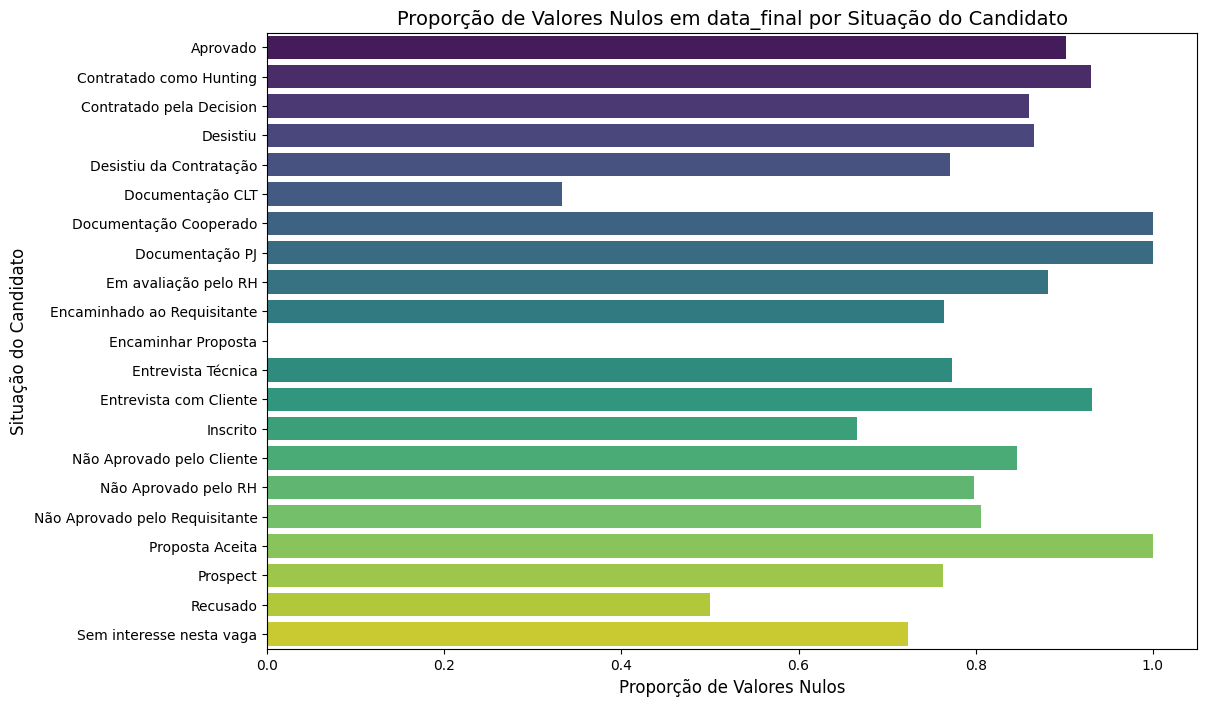

In [208]:
# Criar um DataFrame a partir da correlação calculada
correlacao_data_final_df = correlacao_data_final.reset_index()
correlacao_data_final_df.columns = ['situacao_candidado', 'proporcao_data_final_nulo']

# Criar o gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(
    y='situacao_candidado',  # Colocar os nomes no eixo Y
    x='proporcao_data_final_nulo',  # Colocar os valores no eixo X
    data=correlacao_data_final_df,
    palette='viridis'
)

# Adicionar título e rótulos
plt.title('Proporção de Valores Nulos em data_final por Situação do Candidato', fontsize=14)
plt.xlabel('Proporção de Valores Nulos', fontsize=12)
plt.ylabel('Situação do Candidato', fontsize=12)
plt.show()

In [209]:
#Duração_da_vaga
vagas_prospects_applicants['duracao_vaga'] = (
    vagas_prospects_applicants['data_final'] - vagas_prospects_applicants['data_inicial']
).dt.days
#Duração da candidatura
vagas_prospects_applicants['vaga_aberta'] = vagas_prospects_applicants['data_final'].isnull()

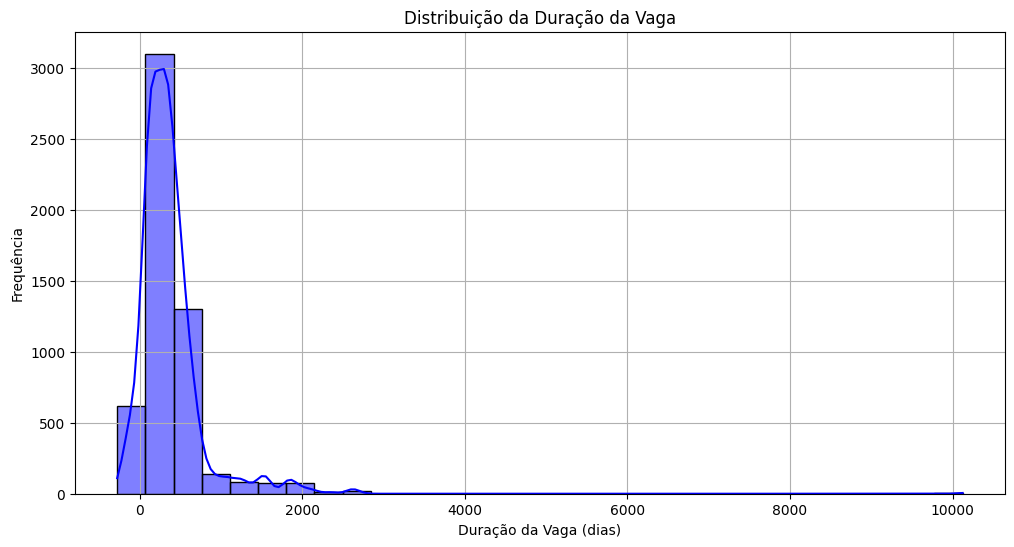

In [210]:
#Crie um grafico baseado na duração da vaga
plt.figure(figsize=(12, 6))
sns.histplot(
    vagas_prospects_applicants['duracao_vaga'].dropna(), 
    bins=30, 
    kde=True, 
    color='blue'
)
plt.title('Distribuição da Duração da Vaga')
plt.xlabel('Duração da Vaga (dias)')
plt.ylabel('Frequência')
plt.grid()
plt.show()

In [211]:
vagas_prospects_applicants['data_inicial_nulo'] = vagas_prospects_applicants['data_inicial'].isnull()
correlacao_data_incial = vagas_prospects_applicants.groupby('situacao_candidado')['data_inicial_nulo'].mean()

/tmp/ipykernel_6224/3864592448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


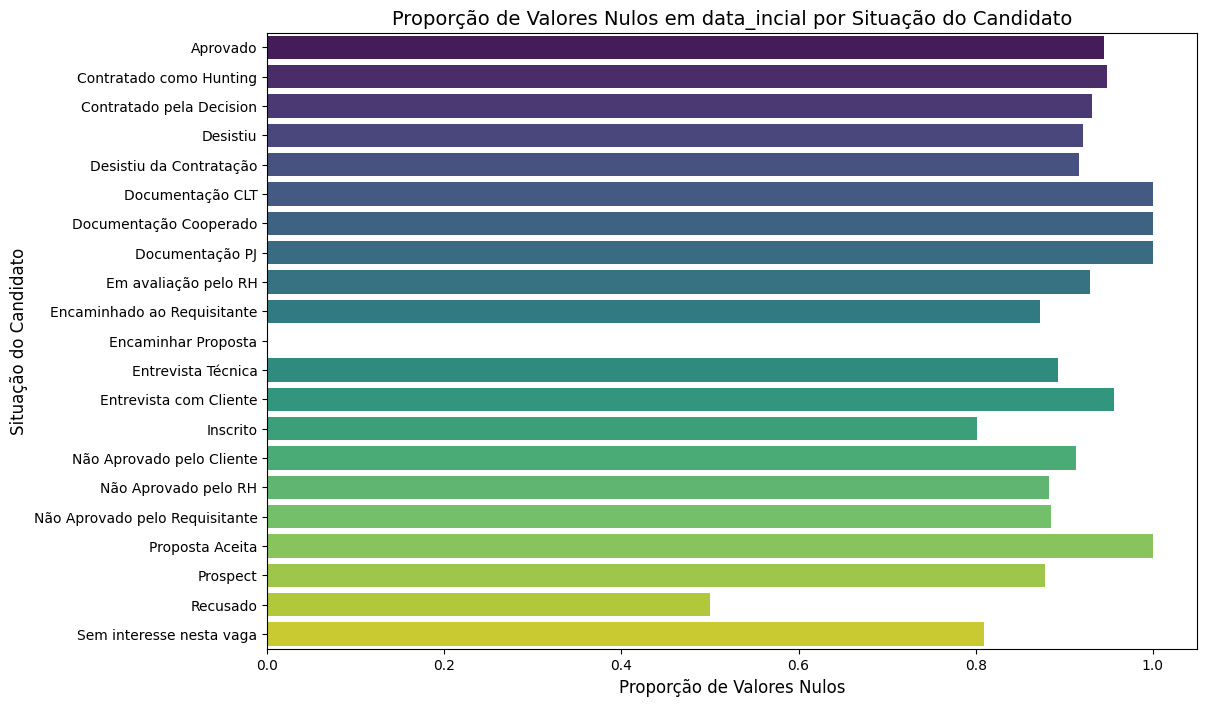

In [212]:
# Criar um DataFrame a partir da correlação calculada
correlacao_data_incial_df = correlacao_data_incial.reset_index()

correlacao_data_incial_df.columns = ['situacao_candidado', 'proporcao_data_incial_nulo']

# Criar o gráfico de barras horizontal
plt.figure(figsize=(12, 8))
sns.barplot(
    y='situacao_candidado',  # Colocar os nomes no eixo Y
    x='proporcao_data_incial_nulo',  # Colocar os valores no eixo X
    data=correlacao_data_incial_df,
    palette='viridis'
)

# Adicionar título e rótulos
plt.title('Proporção de Valores Nulos em data_incial por Situação do Candidato', fontsize=14)
plt.xlabel('Proporção de Valores Nulos', fontsize=12)
plt.ylabel('Situação do Candidato', fontsize=12)
plt.show()

In [213]:
correlacao_data_incial_df

,situacao_candidado,proporcao_data_incial_nulo
0,Aprovado,0.945355
1,Contratado como Hunting,0.947674
2,Contratado pela Decision,0.930790
3,Desistiu,0.921397
4,Desistiu da Contratação,0.916667
5,Documentação CLT,1.000000
6,Documentação Cooperado,1.000000
7,Documentação PJ,1.000000
8,Em avaliação pelo RH,0.929204
9,Encaminhado ao Requisitante,0.872528


In [214]:
vagas_prospects_applicants.where(correlacao_data_incial_df["situacao_candidado"] == "Encaminhar Proposta")

,vaga_id,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente_x,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,ano_conclusao,cargo_atual,projeto_atual,cliente_y,data_admissao,data_ultima_promocao,data_final_nulo,duracao_vaga,vaga_aberta,data_inicial_nulo
0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45066,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45067,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45068,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45069,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [215]:
vagas_prospects_applicants.head()

,vaga_id,data_requicisao,limite_esperado_para_contratacao,titulo_vaga,vaga_sap,cliente_x,solicitante_cliente,empresa_divisao,requisitante,analista_responsavel,...,ano_conclusao,cargo_atual,projeto_atual,cliente_y,data_admissao,data_ultima_promocao,data_final_nulo,duracao_vaga,vaga_aberta,data_inicial_nulo
0,5185,2021-04-05,NaT,Operation Lead -,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Srta. Bella Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,True
1,5184,2021-04-05,NaT,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,True
2,5184,2021-04-05,NaT,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,True
3,5184,2021-04-05,NaT,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,True
4,5184,2021-04-05,NaT,Consultor PP/QM Sênior,Não,"Morris, Moran and Dodson",Dra. Catarina Marques,Decision São Paulo,Maria Laura Nogueira,Yasmin da Rosa,...,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,True,True
